#### Dataset

In [2]:
# Dataset: Mall_Customers.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [6]:
df = pd.read_csv('/home/mitu/Mall_Customers.csv')

In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Separate the input and output data

In [12]:
x = df.iloc[:,[3,4]]

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Explore the data

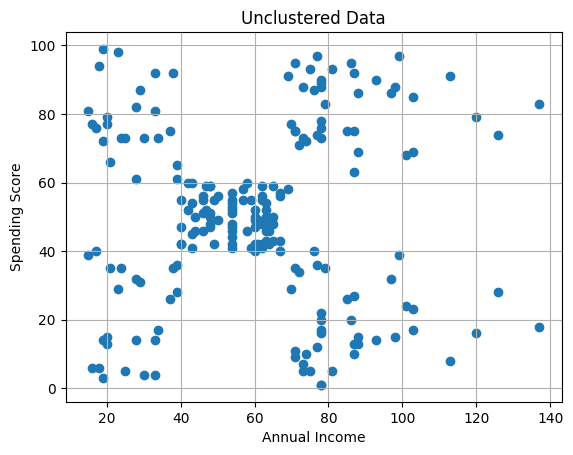

In [15]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

#### Elbow Method

In [17]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(random_state=0, n_clusters=10, n_init='auto')

In [27]:
y = km.fit_predict(x)

In [28]:
km.inertia_

20786.936692059164

In [32]:
sse = []
for k in range(1,16):
    km = KMeans(random_state=0, n_clusters=k, n_init='auto')
    y = km.fit_predict(x)
    sse.append(km.inertia_)

In [33]:
sse

[269981.27999999997,
 185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 38858.95997514391,
 31969.42655023548,
 29858.483597603947,
 22209.851608025547,
 20786.936692059156,
 18612.22286800968,
 17083.672501709316,
 16511.947370563892,
 15599.148331445118,
 14697.298899626934]

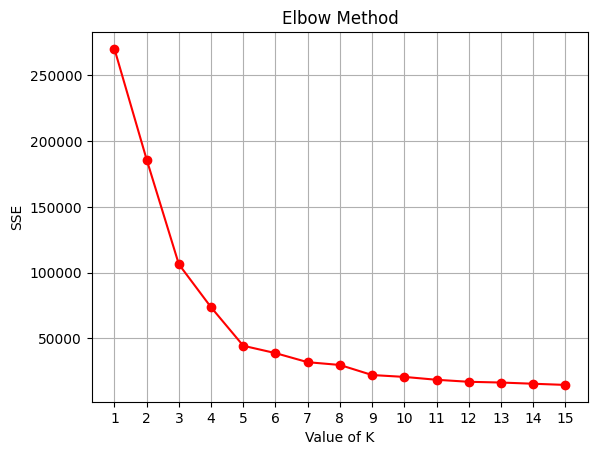

In [34]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker = 'o', color = 'red')

#### Create the clusters

In [36]:
km = KMeans(random_state=0, n_clusters=5, n_init='auto')

In [37]:
y = km.fit_predict(x)

In [38]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [41]:
cents = km.cluster_centers_
cents

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

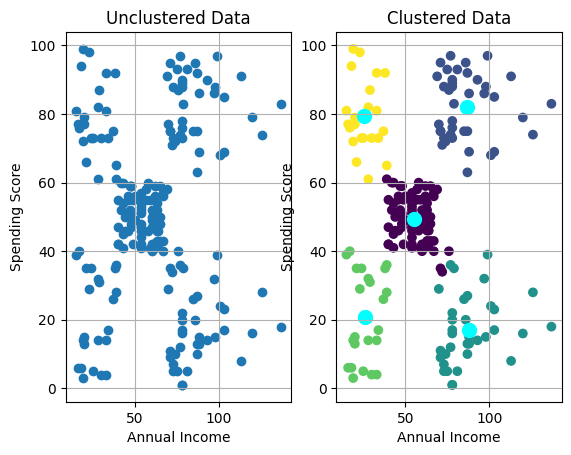

In [44]:
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1], c= y)
plt.scatter(cents[:,0], cents[:,1], s = 100, color = 'cyan')